In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve, auc, recall_score, precision_score, f1_score
from sklearn import svm, datasets
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
import time

In [2]:
test_data_path = r"C:/Users/samru/Desktop/ml-latest-small/ml-latest-small/links.csv"
links_data = pd.read_csv(test_data_path)
links_data['new_movie_id'] = links_data.index
links_data

,movieId,imdbId,tmdbId,new_movie_id
0,1,114709,862.0,0
1,2,113497,8844.0,1
2,3,113228,15602.0,2
3,4,114885,31357.0,3
4,5,113041,11862.0,4
...,...,...,...,...
9737,193581,5476944,432131.0,9737
9738,193583,5914996,445030.0,9738
9739,193585,6397426,479308.0,9739
9740,193587,8391976,483455.0,9740


In [3]:
(np.max(links_data.index.values))

9741

In [4]:
test_data_path = r"C:/Users/samru/Desktop/ml-latest-small/ml-latest-small/movies.csv"
movies_data = pd.read_csv(test_data_path)
new_movie_data=movies_data
movies_data


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
merge_id_data = links_data.drop(columns=['imdbId', 'tmdbId' ])
merge_id_data

,movieId,new_movie_id
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4
...,...,...
9737,193581,9737
9738,193583,9738
9739,193585,9739
9740,193587,9740


In [6]:
test_data_path = r"C:/Users/samru/Desktop/ml-latest-small/ml-latest-small/ratings.csv"
ratings_data = pd.read_csv(test_data_path)
ratings_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
ratings_data = pd.merge(merge_id_data, ratings_data, on="movieId")
ratings_data

,movieId,new_movie_id,userId,rating,timestamp
0,1,0,1,4.0,964982703
1,1,0,5,4.0,847434962
2,1,0,7,4.5,1106635946
3,1,0,15,2.5,1510577970
4,1,0,17,4.5,1305696483
...,...,...,...,...,...
100831,193581,9737,184,4.0,1537109082
100832,193583,9738,184,3.5,1537109545
100833,193585,9739,184,3.5,1537109805
100834,193587,9740,184,3.5,1537110021


In [8]:
test_data_path = r"C:/Users/samru/Desktop/ml-latest-small/ml-latest-small/tags.csv"
tags_data = pd.read_csv(test_data_path)
tags_data

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [9]:
genre_data=pd.concat([Series(row['title'], row['genres'].split('|'))              
                    for _, row in movies_data.iterrows()]).reset_index()
genre_data_count=genre_data['index'].value_counts()
genre_data_count

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: index, dtype: int64

In [10]:
genre_list = ['Drama','Comedy','Thriller','Action','Romance','Adventure','Crime','Sci-Fi','Horror','Fantasy','Children','Animation','Mystery','Documentary','War','Musical','Western','IMAX','Film-Noir','(no genres listed)']

In [11]:
for i in range(len(genre_list)):
    new_movie_data[genre_list[i]] = new_movie_data['genres'].apply(lambda x: 1 if genre_list[i] in x else 0)

new_movie_data = pd.merge(merge_id_data, new_movie_data, on="movieId")
new_movie_data

,movieId,new_movie_id,title,genres,Drama,Comedy,Thriller,Action,Romance,Adventure,...,Children,Animation,Mystery,Documentary,War,Musical,Western,IMAX,Film-Noir,(no genres listed)
0,1,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
1,2,1,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,2,Grumpier Old Men (1995),Comedy|Romance,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3,Waiting to Exhale (1995),Comedy|Drama|Romance,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,4,Father of the Bride Part II (1995),Comedy,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9738,193583,9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9739,193585,9739,Flint (2017),Drama,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
'''
ratings_mat = np.ndarray(
    shape=(np.max(ratings_data.new_movie_id.values), np.max(ratings_data.userId.values)),
    dtype=np.uint8)
ratings_mat[ratings_data.new_movie_id.values-1, ratings_data.userId.values-1] = ratings_data.rating.values
'''

In [15]:
'''
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T
'''

In [16]:
'''
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)
'''

In [17]:
'''
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1 in the dataset
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]
    '''

In [ ]:
'''
def print_similar_movies(genre_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    genre_data[genre_data.movie_id == movie_id].movie_title.values[0]))
    for id in top_indexes + 1:
        print(genre_data[genre_data.movie_id == id].movie_title.values[0])
        '''

In [18]:
'''
k = 50
movie_id = 1 # (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)
'''

C:\Users\samru\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [65]:
'''
print_similar_movies(genre_data, movie_id, indexes)
'''

'\nprint_similar_movies(genre_data, movie_id, indexes)\n'

In [12]:
p = ratings_data.groupby('rating')['rating'].agg(['count'])

# get movie count
movie_count = ratings_data.isnull().sum()[1]
movie_num = ratings_data['new_movie_id'].nunique()

# get customer count
cust_count = ratings_data['userId'].nunique()

# get rating count
rating_count = ratings_data['userId'].count()

print('Movies:', movie_num)
print('Users:',  cust_count)
print('Ratings Given:', rating_count)


Movies: 9724
Users: 610
Ratings Given: 100836


In [13]:
ratings_data['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

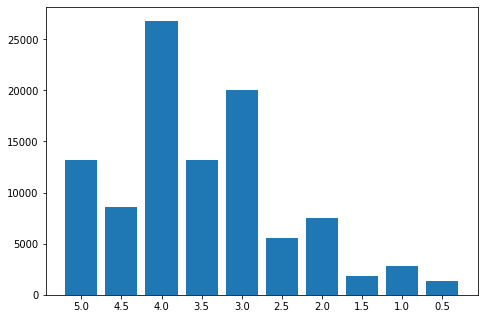

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Ratings = ['5.0', '4.5', '4.0', '3.5', '3.0', '2.5', '2.0', '1.5', '1.0', '0.5']
Number_of_Ratings = [13211,8551,26818,13136,20047,5550,7551,1791,2811,1370]
ax.bar(Ratings,Number_of_Ratings)
plt.show()

In [16]:
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(ratings_data[['userId', 'new_movie_id', 'rating']][:], reader)
#data.split(n_folds=3)

svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])

{'test_rmse': array([0.886483  , 0.87261984, 0.86091434, 0.87642414, 0.87229811]),
 'test_mae': array([0.68292093, 0.66917201, 0.66165298, 0.6726828 , 0.67043391]),
 'fit_time': (4.31622052192688,
  4.309804201126099,
  4.226440668106079,
  4.093365907669067,
  4.082782506942749),
 'test_time': (0.12497162818908691,
  0.10934591293334961,
  0.14059162139892578,
  0.10934996604919434,
  0.09373092651367188)}

In [18]:
f = ['count','mean']

df_movie_summary = ratings_data.groupby('movieId')['rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

In [40]:
def movie_recs(user):
    user_liked_movies = ratings_data[(ratings_data['userId'] == user) & (ratings_data['rating'] == 5)]
    user_liked_movies = user_liked_movies.set_index('movieId')
    user_liked_movies = pd.merge(movies_data, user_liked_movies, on="movieId")
    Movies_liked = user_liked_movies['title']
    
    user_liked_movie = movies_data.copy()
    user_liked_movie = user_liked_movie.reset_index()
    user_liked_movie = user_liked_movie[~user_liked_movie['movieId'].isin(drop_movie_list)]

    # getting full dataset
    data = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)

    trainset = data.build_full_trainset()
    svd.fit(trainset)

    user_liked_movie['Estimate_Rating'] = user_liked_movie['movieId'].apply(lambda x: svd.predict(user, x).est)

    user_liked_movie = user_liked_movie.drop('movieId', axis = 1)
    
    user_liked_movie = user_liked_movie.sort_values('Estimate_Rating', ascending=False)
    recommended_movies = user_liked_movie[['title','Estimate_Rating']]
    
    print('Movies The User Likes')
    print('')
    print(Movies_liked.head(5))
    print('')
    print('')
    print('Recommended Movies with estimated Ratings:')
    print('')
    print(recommended_movies.head(5))
    
    #return(Movies_liked.head(20), recommended_movies.head(10))

In [43]:
start = time.time()
movie_recs(user = 35)
svd_time = time.time() - start

Movies The User Likes

0                     Get Shorty (1995)
1            Usual Suspects, The (1995)
2    Indian in the Cupboard, The (1995)
3             Mr. Holland's Opus (1995)
4                      Apollo 13 (1995)
Name: title, dtype: object


Recommended Movies with estimated Ratings:

                                                  title  Estimate_Rating
277                    Shawshank Redemption, The (1994)         5.000000
602   Dr. Strangelove or: How I Learned to Stop Worr...         4.927472
2593                                Hustler, The (1961)         4.909303
686                                  Rear Window (1954)         4.867098
841                    Streetcar Named Desire, A (1951)         4.866153


In [44]:
print ('Time for SVD Method: {}'.format(svd_time))

Time for SVD Method: 4.508792161941528
